In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
%matplotlib inline

In [2]:
sc= pd.read_csv('supply_chain_data.csv')
sc.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
sc.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [5]:
sc.duplicated().sum()

0

Text(0.5, 1.0, 'Product Type')

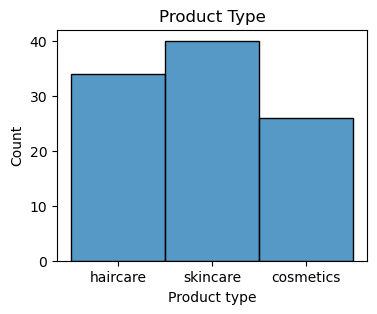

In [6]:
fig = plt.figure(figsize=(4,3))
sns.histplot(data=sc,x='Product type')
plt.title('Product Type')

<Axes: xlabel='Price', ylabel='Count'>

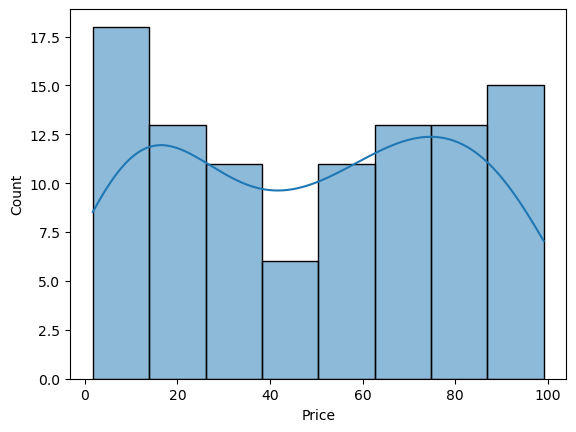

In [7]:
sns.histplot(data=sc,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

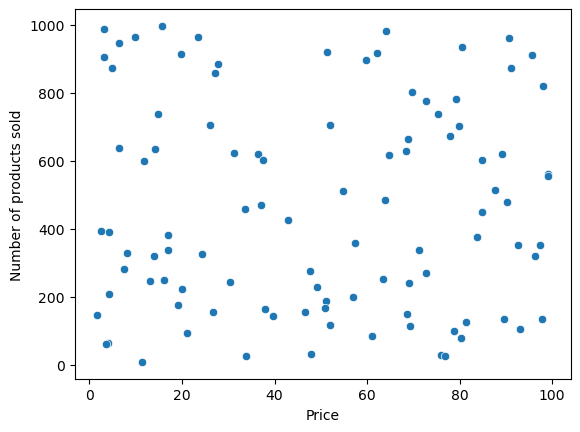

In [8]:
sns.scatterplot(data=sc,x='Price',y='Number of products sold')

In [9]:
sc.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


<Axes: xlabel='Price', ylabel='Product type'>

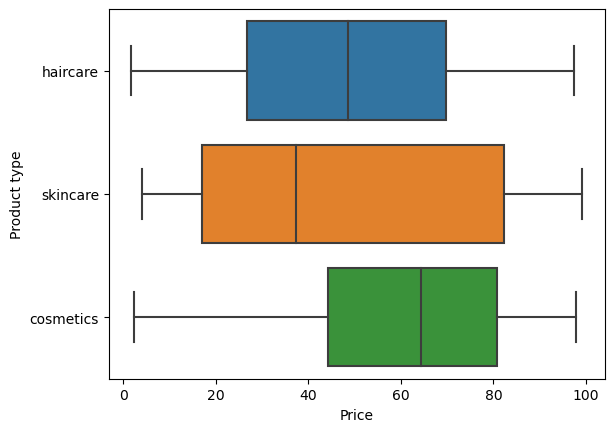

In [10]:
sns.boxplot(data=sc,x='Price',y='Product type')

<Axes: xlabel='Customer demographics', ylabel='Count'>

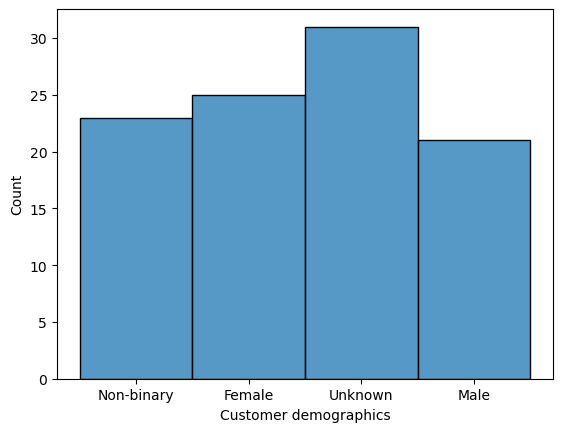

In [11]:
sns.histplot(data=sc,x='Customer demographics')

<Axes: xlabel='Location', ylabel='Count'>

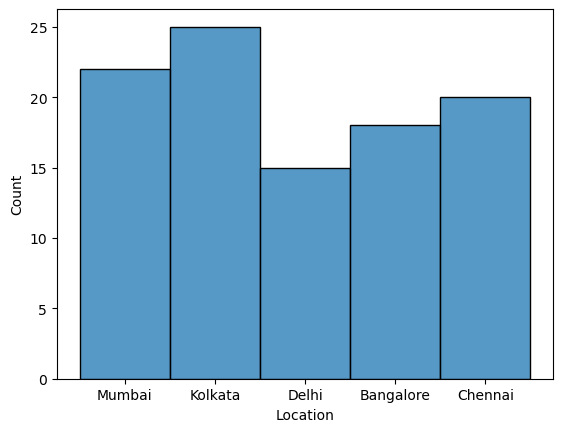

In [12]:
sns.histplot(data=sc,x='Location')

Text(0.5, 1.0, 'Price of different products in Locations')

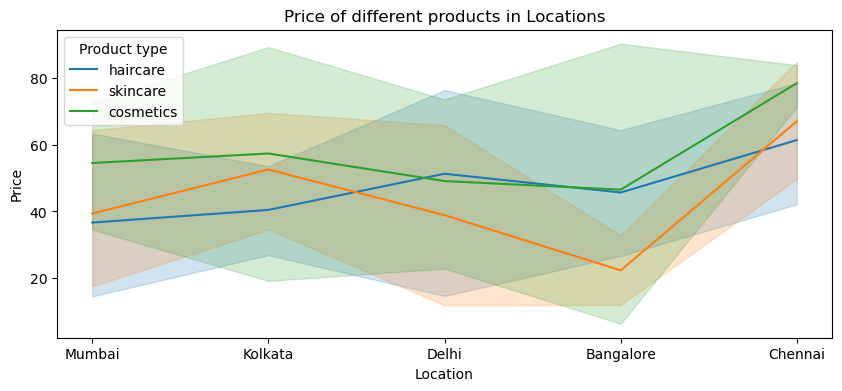

In [15]:
plt.figure(figsize=(10,4))
sns.lineplot(data=sc,y='Price',x='Location',hue='Product type')
plt.title('Price of different products in Locations')

In [20]:
sc.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [19]:
sc.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [21]:
sc=sc.drop('SKU',axis=1)

In [22]:
lb = LabelEncoder()
columns = ['Product type','Customer demographics','Shipping carriers','Supplier name','Location','Inspection results','Transportation modes','Routes']
for c in columns:
    sc[c]=lb.fit_transform(sc[c])
    sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int32  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    object 
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    object 
 11  Shipping costs           100 non-null    float64
 12  Supplier name            100 non-null    object 
 13  Location                 100 non-null    object 
 14  Lead time                10

In [23]:
#correlation matrix with it's heatmap plotted

<Axes: >

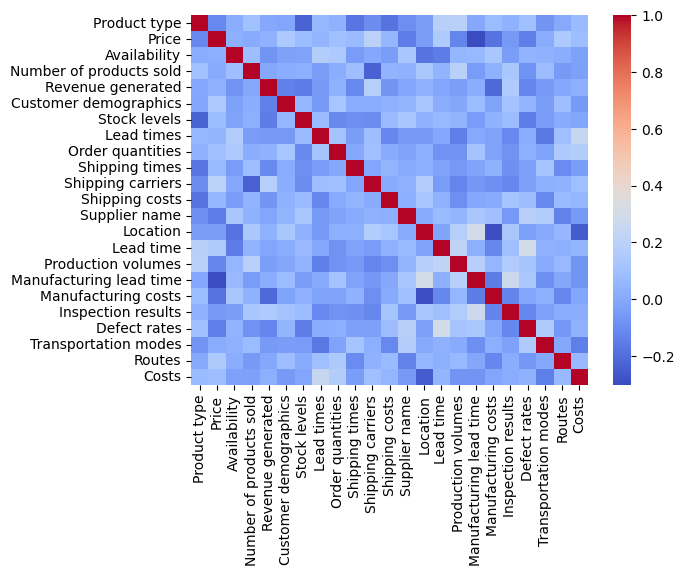

In [24]:
sns.heatmap(sc.corr(),cmap='coolwarm')

Text(0.5, 1.0, "The features' correlation to Price ")

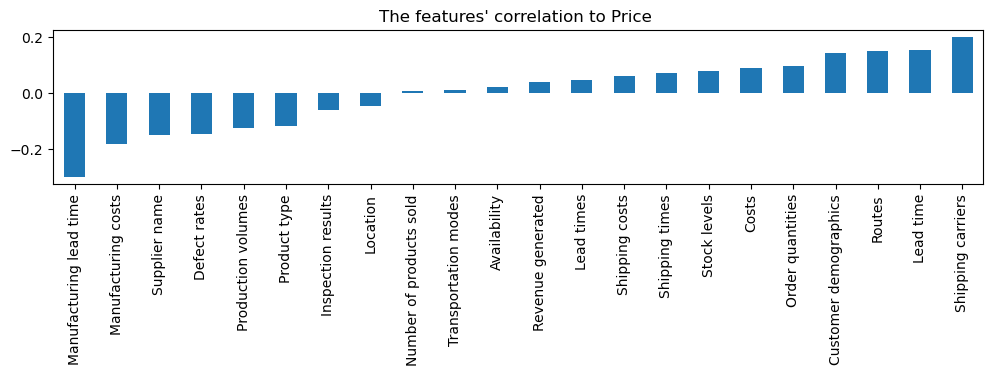

In [26]:
fig  = plt.figure(figsize=(12,2))
sc.corr()['Price'].sort_values()[:-1].plot(kind='bar')
plt.title('The features\' correlation to Price ')

In [93]:
X=sc.drop('Price',axis=1).values
y=sc['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [94]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [95]:
print('X_train shape: ',X_train.shape)
print('X test shape: ',X_test.shape)

X_train shape:  (80, 22)
X test shape:  (20, 22)


In [96]:
model = Sequential()
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [97]:
scModel = model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=130,epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 910ms/step - loss: 2396496.5000 - mae: 1366.7620 - val_loss: 3033060.5000 - val_mae: 1587.2230
Epoch 2/400
1/1 [==============================] - 0s 41ms/step - loss: 2165826.2500 - mae: 1298.2952 - val_loss: 2742955.0000 - val_mae: 1509.2604
Epoch 3/400
1/1 [==============================] - 0s 42ms/step - loss: 1953223.2500 - mae: 1231.9799 - val_loss: 2474874.5000 - val_mae: 1433.5105
Epoch 4/400
1/1 [==============================] - 0s 38ms/step - loss: 1758550.0000 - mae: 1168.0573 - val_loss: 2229092.0000 - val_mae: 1360.2283
Epoch 5/400
1/1 [==============================] - 0s 45ms/step - loss: 1581373.6250 - mae: 1106.6511 - val_loss: 2003951.6250 - val_mae: 1289.4642
Epoch 6/400
1/1 [==============================] - 0s 38ms/step - loss: 1420576.0000 - mae: 1047.8933 - val_loss: 1802350.6250 - val_mae: 1222.4229
Epoch 7/400
1/1 [==============================] - 0s 39ms/step - loss: 1274937.2500 - mae: 991.6680 - val_loss

1/1 [==============================] - 0s 40ms/step - loss: 1471.9656 - mae: 30.1335 - val_loss: 2332.4485 - val_mae: 42.0990
Epoch 59/400
1/1 [==============================] - 0s 35ms/step - loss: 1436.9192 - mae: 29.7820 - val_loss: 2139.0508 - val_mae: 40.2202
Epoch 60/400
1/1 [==============================] - 0s 37ms/step - loss: 1369.6257 - mae: 29.1287 - val_loss: 1889.5104 - val_mae: 37.6563
Epoch 61/400
1/1 [==============================] - 0s 37ms/step - loss: 1291.1381 - mae: 28.6537 - val_loss: 1625.1539 - val_mae: 35.1250
Epoch 62/400
1/1 [==============================] - 0s 37ms/step - loss: 1220.5648 - mae: 28.4579 - val_loss: 1378.6204 - val_mae: 32.5722
Epoch 63/400
1/1 [==============================] - 0s 37ms/step - loss: 1170.1514 - mae: 28.3737 - val_loss: 1171.2249 - val_mae: 30.2592
Epoch 64/400
1/1 [==============================] - 0s 36ms/step - loss: 1145.9567 - mae: 28.6028 - val_loss: 1013.1602 - val_mae: 28.4375
Epoch 65/400
1/1 [======================

Epoch 117/400
1/1 [==============================] - 0s 38ms/step - loss: 1071.1074 - mae: 28.0226 - val_loss: 1282.1108 - val_mae: 32.1115
Epoch 118/400
1/1 [==============================] - 0s 37ms/step - loss: 1069.8589 - mae: 27.9921 - val_loss: 1297.5007 - val_mae: 32.2948
Epoch 119/400
1/1 [==============================] - 0s 35ms/step - loss: 1068.7219 - mae: 27.9611 - val_loss: 1312.1371 - val_mae: 32.4671
Epoch 120/400
1/1 [==============================] - 0s 34ms/step - loss: 1067.6941 - mae: 27.9318 - val_loss: 1325.0494 - val_mae: 32.6177
Epoch 121/400
1/1 [==============================] - 0s 37ms/step - loss: 1066.7336 - mae: 27.9060 - val_loss: 1335.4905 - val_mae: 32.7384
Epoch 122/400
1/1 [==============================] - 0s 35ms/step - loss: 1065.7854 - mae: 27.8852 - val_loss: 1343.0063 - val_mae: 32.8247
Epoch 123/400
1/1 [==============================] - 0s 34ms/step - loss: 1064.8702 - mae: 27.8709 - val_loss: 1347.4720 - val_mae: 32.8756
Epoch 124/400
1/1 [=

1/1 [==============================] - 0s 36ms/step - loss: 1028.7661 - mae: 27.5759 - val_loss: 1442.3584 - val_mae: 33.8363
Epoch 176/400
1/1 [==============================] - 0s 35ms/step - loss: 1028.0588 - mae: 27.5580 - val_loss: 1445.5667 - val_mae: 33.8725
Epoch 177/400
1/1 [==============================] - 0s 36ms/step - loss: 1027.3606 - mae: 27.5400 - val_loss: 1448.7355 - val_mae: 33.9081
Epoch 178/400
1/1 [==============================] - 0s 40ms/step - loss: 1026.6748 - mae: 27.5223 - val_loss: 1451.7644 - val_mae: 33.9421
Epoch 179/400
1/1 [==============================] - 0s 43ms/step - loss: 1026.0009 - mae: 27.5048 - val_loss: 1454.5798 - val_mae: 33.9734
Epoch 180/400
1/1 [==============================] - 0s 42ms/step - loss: 1025.3386 - mae: 27.4879 - val_loss: 1457.1312 - val_mae: 34.0014
Epoch 181/400
1/1 [==============================] - 0s 44ms/step - loss: 1024.7874 - mae: 27.4805 - val_loss: 1460.3556 - val_mae: 34.0379
Epoch 182/400
1/1 [===============

Epoch 234/400
1/1 [==============================] - 0s 35ms/step - loss: 996.5724 - mae: 27.1165 - val_loss: 1591.3308 - val_mae: 35.3623
Epoch 235/400
1/1 [==============================] - 0s 38ms/step - loss: 996.2450 - mae: 27.0991 - val_loss: 1598.6169 - val_mae: 35.4543
Epoch 236/400
1/1 [==============================] - 0s 37ms/step - loss: 995.8563 - mae: 27.0811 - val_loss: 1605.3767 - val_mae: 35.5393
Epoch 237/400
1/1 [==============================] - 0s 42ms/step - loss: 995.5142 - mae: 27.0651 - val_loss: 1610.8671 - val_mae: 35.6086
Epoch 238/400
1/1 [==============================] - 0s 34ms/step - loss: 995.1963 - mae: 27.0521 - val_loss: 1613.3032 - val_mae: 35.6384
Epoch 239/400
1/1 [==============================] - 0s 39ms/step - loss: 994.9676 - mae: 27.0473 - val_loss: 1610.5349 - val_mae: 35.6000
Epoch 240/400
1/1 [==============================] - 0s 38ms/step - loss: 994.4280 - mae: 27.0510 - val_loss: 1607.2047 - val_mae: 35.5552
Epoch 241/400
1/1 [========

Epoch 293/400
1/1 [==============================] - 0s 40ms/step - loss: 970.2833 - mae: 26.7737 - val_loss: 1694.9158 - val_mae: 36.3803
Epoch 294/400
1/1 [==============================] - 0s 37ms/step - loss: 969.9310 - mae: 26.7702 - val_loss: 1694.8304 - val_mae: 36.3759
Epoch 295/400
1/1 [==============================] - 0s 38ms/step - loss: 969.5692 - mae: 26.7683 - val_loss: 1695.9235 - val_mae: 36.3873
Epoch 296/400
1/1 [==============================] - 0s 40ms/step - loss: 969.2199 - mae: 26.7633 - val_loss: 1696.5465 - val_mae: 36.3919
Epoch 297/400
1/1 [==============================] - 0s 36ms/step - loss: 968.8640 - mae: 26.7596 - val_loss: 1698.3438 - val_mae: 36.4122
Epoch 298/400
1/1 [==============================] - 0s 37ms/step - loss: 968.5140 - mae: 26.7528 - val_loss: 1699.5541 - val_mae: 36.4244
Epoch 299/400
1/1 [==============================] - 0s 36ms/step - loss: 968.1578 - mae: 26.7476 - val_loss: 1700.1429 - val_mae: 36.4279
Epoch 300/400
1/1 [========

Epoch 352/400
1/1 [==============================] - 0s 38ms/step - loss: 953.0960 - mae: 26.5510 - val_loss: 1704.8674 - val_mae: 36.5657
Epoch 353/400
1/1 [==============================] - 0s 36ms/step - loss: 952.8295 - mae: 26.5511 - val_loss: 1704.1619 - val_mae: 36.5598
Epoch 354/400
1/1 [==============================] - 0s 40ms/step - loss: 952.5989 - mae: 26.5499 - val_loss: 1703.8148 - val_mae: 36.5608
Epoch 355/400
1/1 [==============================] - 0s 43ms/step - loss: 952.3182 - mae: 26.5461 - val_loss: 1703.7253 - val_mae: 36.5670
Epoch 356/400
1/1 [==============================] - 0s 47ms/step - loss: 952.0402 - mae: 26.5407 - val_loss: 1702.3112 - val_mae: 36.5553
Epoch 357/400
1/1 [==============================] - 0s 40ms/step - loss: 951.8029 - mae: 26.5389 - val_loss: 1700.0944 - val_mae: 36.5314
Epoch 358/400
1/1 [==============================] - 0s 38ms/step - loss: 951.4850 - mae: 26.5391 - val_loss: 1697.1582 - val_mae: 36.4972
Epoch 359/400
1/1 [========

<Axes: >

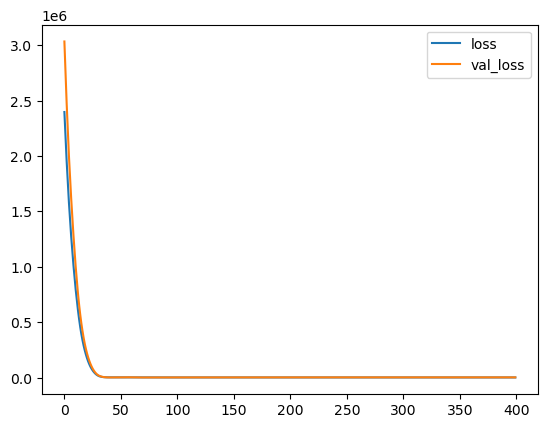

In [98]:
losses = {'loss':scModel.model.history.history['loss'],'val_loss':scModel.model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

<Axes: >

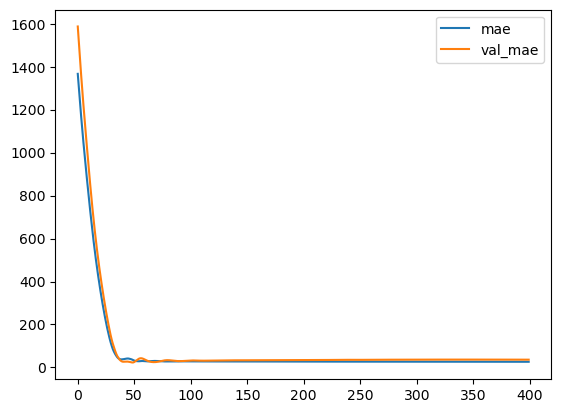

In [99]:
mae = {'mae':scModel.model.history.history['mae'],'val_mae':scModel.model.history.history['val_mae']}
mae = pd.DataFrame(mae)
mae.plot()

In [ ]:
#Predicting the prices using the model

In [100]:
yPreds = model.predict(X_test)
print('Evauation metrics of model with scModel data ')
print('MAE: %.03f'%mean_absolute_error(y_test,yPreds))
print('MSE: %.03f'%mean_squared_error(y_test,yPreds))
print('RMSE: %.03f'%np.sqrt(mean_squared_error(y_test,yPreds)))
print('R2 score: %.03f'%explained_variance_score(y_test,yPreds))

1/1 [==============================] - 0s 90ms/step
Evauation metrics of model with scModel data 
MAE: 36.265
MSE: 1663.968
RMSE: 40.792
R2 score: -0.250


In [103]:
model = Sequential()
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(22,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
sc2Model = model.fit(x=X_train_norm,y=y_train,
          validation_data=(X_test_norm,y_test),
          batch_size=130,epochs=400)

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 3886.2397 - mae: 54.3485 - val_loss: 1672.8450 - val_mae: 31.6741
Epoch 2/400
1/1 [==============================] - 0s 43ms/step - loss: 3880.2266 - mae: 54.2938 - val_loss: 1670.3336 - val_mae: 31.6269
Epoch 3/400
1/1 [==============================] - 0s 44ms/step - loss: 3874.3430 - mae: 54.2403 - val_loss: 1667.9401 - val_mae: 31.5806
Epoch 4/400
1/1 [==============================] - 0s 41ms/step - loss: 3868.5430 - mae: 54.1875 - val_loss: 1665.5367 - val_mae: 31.5342
Epoch 5/400
1/1 [==============================] - 0s 47ms/step - loss: 3862.8540 - mae: 54.1356 - val_loss: 1663.1869 - val_mae: 31.4886
Epoch 6/400
1/1 [==============================] - 0s 46ms/step - loss: 3857.2422 - mae: 54.0839 - val_loss: 1660.8795 - val_mae: 31.4437
Epoch 7/400
1/1 [==============================] - 0s 42ms/step - loss: 3851.6157 - mae: 54.0322 - val_loss: 1658.5676 - val_mae: 31.3988
Epoch 8/400
1/1 [===================

1/1 [==============================] - 0s 43ms/step - loss: 3216.7253 - mae: 48.2830 - val_loss: 1328.5043 - val_mae: 25.6772
Epoch 61/400
1/1 [==============================] - 0s 35ms/step - loss: 3188.4663 - mae: 48.0407 - val_loss: 1314.0638 - val_mae: 25.4455
Epoch 62/400
1/1 [==============================] - 0s 33ms/step - loss: 3159.2080 - mae: 47.7883 - val_loss: 1299.2446 - val_mae: 25.2046
Epoch 63/400
1/1 [==============================] - 0s 33ms/step - loss: 3128.9136 - mae: 47.5251 - val_loss: 1284.0129 - val_mae: 24.9537
Epoch 64/400
1/1 [==============================] - 0s 35ms/step - loss: 3097.5894 - mae: 47.2511 - val_loss: 1268.3835 - val_mae: 24.7330
Epoch 65/400
1/1 [==============================] - 0s 34ms/step - loss: 3065.2490 - mae: 46.9659 - val_loss: 1252.3474 - val_mae: 24.5033
Epoch 66/400
1/1 [==============================] - 0s 34ms/step - loss: 3031.8516 - mae: 46.6692 - val_loss: 1235.9583 - val_mae: 24.2647
Epoch 67/400
1/1 [======================

1/1 [==============================] - 0s 36ms/step - loss: 981.6603 - mae: 27.4872 - val_loss: 1207.8328 - val_mae: 30.3000
Epoch 120/400
1/1 [==============================] - 0s 35ms/step - loss: 978.1168 - mae: 27.3568 - val_loss: 1239.1372 - val_mae: 30.7141
Epoch 121/400
1/1 [==============================] - 0s 36ms/step - loss: 975.9172 - mae: 27.2502 - val_loss: 1268.9764 - val_mae: 31.1251
Epoch 122/400
1/1 [==============================] - 0s 39ms/step - loss: 974.7816 - mae: 27.1568 - val_loss: 1296.9901 - val_mae: 31.4996
Epoch 123/400
1/1 [==============================] - 0s 33ms/step - loss: 974.4279 - mae: 27.0796 - val_loss: 1322.7858 - val_mae: 31.8349
Epoch 124/400
1/1 [==============================] - 0s 35ms/step - loss: 974.6578 - mae: 27.0245 - val_loss: 1345.9004 - val_mae: 32.1290
Epoch 125/400
1/1 [==============================] - 0s 44ms/step - loss: 975.2617 - mae: 26.9799 - val_loss: 1366.1814 - val_mae: 32.3819
Epoch 126/400
1/1 [======================

1/1 [==============================] - 0s 35ms/step - loss: 945.3563 - mae: 26.6912 - val_loss: 1254.4691 - val_mae: 30.9324
Epoch 179/400
1/1 [==============================] - 0s 36ms/step - loss: 944.8009 - mae: 26.6781 - val_loss: 1255.8333 - val_mae: 30.9509
Epoch 180/400
1/1 [==============================] - 0s 33ms/step - loss: 944.2477 - mae: 26.6653 - val_loss: 1257.0637 - val_mae: 30.9676
Epoch 181/400
1/1 [==============================] - 0s 31ms/step - loss: 943.6960 - mae: 26.6528 - val_loss: 1258.1501 - val_mae: 30.9823
Epoch 182/400
1/1 [==============================] - 0s 33ms/step - loss: 943.1452 - mae: 26.6405 - val_loss: 1259.0856 - val_mae: 30.9949
Epoch 183/400
1/1 [==============================] - 0s 31ms/step - loss: 942.5946 - mae: 26.6286 - val_loss: 1259.8646 - val_mae: 31.0054
Epoch 184/400
1/1 [==============================] - 0s 31ms/step - loss: 942.0436 - mae: 26.6170 - val_loss: 1260.4854 - val_mae: 31.0138
Epoch 185/400
1/1 [======================

1/1 [==============================] - 0s 33ms/step - loss: 909.9797 - mae: 26.1004 - val_loss: 1235.5042 - val_mae: 30.6707
Epoch 238/400
1/1 [==============================] - 0s 36ms/step - loss: 909.3133 - mae: 26.0894 - val_loss: 1235.1166 - val_mae: 30.6651
Epoch 239/400
1/1 [==============================] - 0s 42ms/step - loss: 908.6442 - mae: 26.0783 - val_loss: 1234.7131 - val_mae: 30.6593
Epoch 240/400
1/1 [==============================] - 0s 35ms/step - loss: 907.9762 - mae: 26.0673 - val_loss: 1234.2822 - val_mae: 30.6530
Epoch 241/400
1/1 [==============================] - 0s 33ms/step - loss: 907.3060 - mae: 26.0563 - val_loss: 1233.8248 - val_mae: 30.6465
Epoch 242/400
1/1 [==============================] - 0s 32ms/step - loss: 906.6334 - mae: 26.0454 - val_loss: 1233.3429 - val_mae: 30.6395
Epoch 243/400
1/1 [==============================] - 0s 31ms/step - loss: 905.9581 - mae: 26.0344 - val_loss: 1232.8376 - val_mae: 30.6322
Epoch 244/400
1/1 [======================

1/1 [==============================] - 0s 49ms/step - loss: 865.8280 - mae: 25.3722 - val_loss: 1201.8052 - val_mae: 30.1700
Epoch 297/400
1/1 [==============================] - 0s 42ms/step - loss: 865.0010 - mae: 25.3573 - val_loss: 1201.3705 - val_mae: 30.1628
Epoch 298/400
1/1 [==============================] - 0s 39ms/step - loss: 864.1708 - mae: 25.3422 - val_loss: 1200.9377 - val_mae: 30.1557
Epoch 299/400
1/1 [==============================] - 0s 36ms/step - loss: 863.3395 - mae: 25.3271 - val_loss: 1200.5176 - val_mae: 30.1487
Epoch 300/400
1/1 [==============================] - 0s 37ms/step - loss: 862.5076 - mae: 25.3119 - val_loss: 1200.0946 - val_mae: 30.1417
Epoch 301/400
1/1 [==============================] - 0s 41ms/step - loss: 861.6733 - mae: 25.2965 - val_loss: 1199.6877 - val_mae: 30.1349
Epoch 302/400
1/1 [==============================] - 0s 40ms/step - loss: 860.8369 - mae: 25.2810 - val_loss: 1199.2904 - val_mae: 30.1282
Epoch 303/400
1/1 [======================

1/1 [==============================] - 0s 38ms/step - loss: 814.5692 - mae: 24.4254 - val_loss: 1161.5325 - val_mae: 29.5084
Epoch 356/400
1/1 [==============================] - 0s 35ms/step - loss: 813.6852 - mae: 24.4083 - val_loss: 1160.7545 - val_mae: 29.4951
Epoch 357/400
1/1 [==============================] - 0s 41ms/step - loss: 812.7999 - mae: 24.3908 - val_loss: 1160.0735 - val_mae: 29.4828
Epoch 358/400
1/1 [==============================] - 0s 35ms/step - loss: 811.9120 - mae: 24.3727 - val_loss: 1159.4421 - val_mae: 29.4713
Epoch 359/400
1/1 [==============================] - 0s 40ms/step - loss: 811.0262 - mae: 24.3543 - val_loss: 1158.7737 - val_mae: 29.4591
Epoch 360/400
1/1 [==============================] - 0s 42ms/step - loss: 810.1406 - mae: 24.3360 - val_loss: 1158.0654 - val_mae: 29.4463
Epoch 361/400
1/1 [==============================] - 0s 39ms/step - loss: 809.2567 - mae: 24.3180 - val_loss: 1157.1603 - val_mae: 29.4309
Epoch 362/400
1/1 [======================

<Axes: >

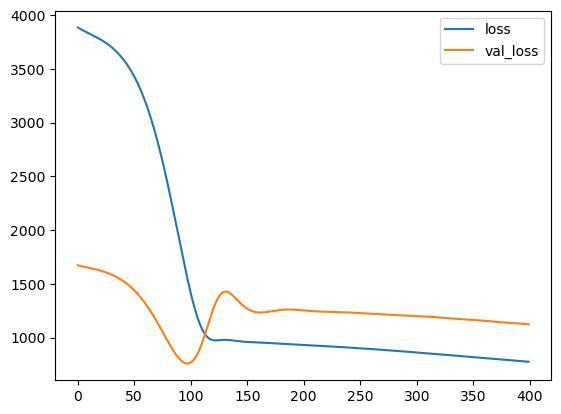

In [104]:
losses = {'loss':sc2Model.model.history.history['loss'],'val_loss':sc2Model.model.history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

<Axes: >

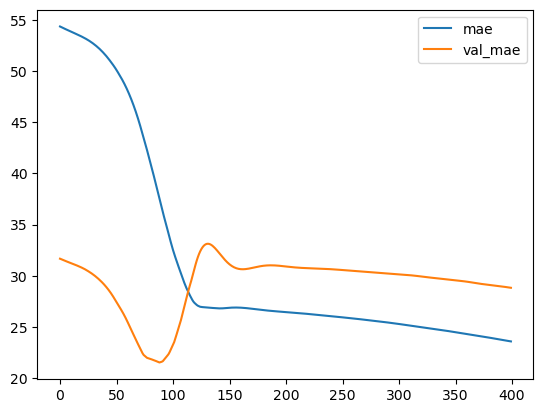

In [105]:
mae = {'mae':sc2Model.model.history.history['mae'],'val_mae':sc2Model.model.history.history['val_mae']}
mae = pd.DataFrame(mae)
mae.plot()

In [107]:
yNormPreds = model.predict(X_test_norm)
print('Evaluation metrics of model with normalized data')
print('MAE: %.03f'%mean_absolute_error(y_test,yNormPreds))
print('MSE: %.03f'%mean_squared_error(y_test,yNormPreds))
print('RMSE: %.03f'%np.sqrt(mean_squared_error(y_test,yNormPreds)))
print('R2 score: %.03f'%explained_variance_score(y_test,yNormPreds))

1/1 [==============================] - 0s 57ms/step
Evaluation metrics of model with normalized data
MAE: 28.833
MSE: 1124.221
RMSE: 33.529
R2 score: -0.016


Text(0, 0.5, 'Predicted price')

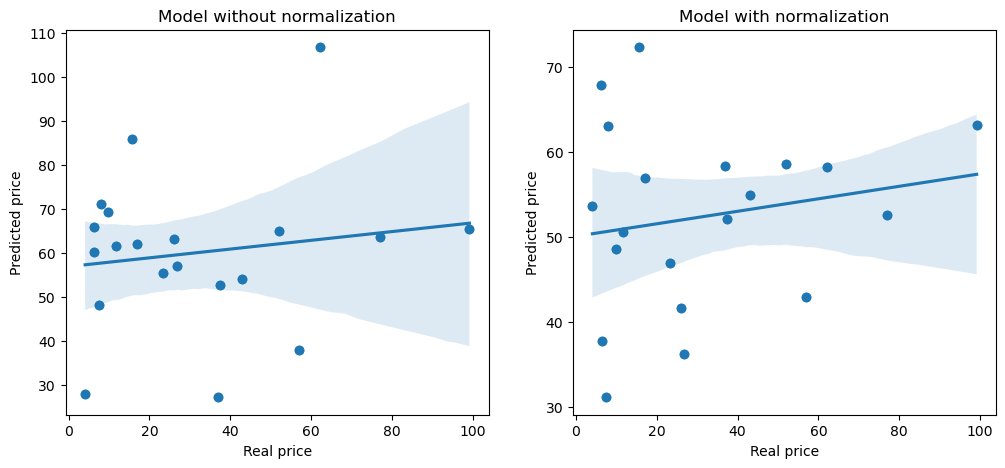

In [108]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test,yPreds)
plt.title('Model without normalization')
sns.regplot(x=y_test,y=yPreds)
plt.xlabel('Real price')
plt.ylabel('Predicted price')

plt.subplot(1,2,2)
plt.scatter(y_test,yNormPreds)
sns.regplot(x=y_test,y=yNormPreds)
plt.title('Model with normalization')
plt.xlabel('Real price')
plt.ylabel('Predicted price')

In [ ]:
#Model with Normalized data performed better than the model with unnormalized data. It was able to explain 12% of the predictions with an R2-score of 0.129 but the other model had a R2 score which meant it couldn't explain any of its predictions.

#Model with normalization

#MAE: 26.290
#MSE: 940.151
#RMSE: 30.662
#R2 score: 0.129
#Model without Normalization

#MAE: 34.008
#MSE: 1482.000
#RMSE: 38.497
#R2 score: -0.397
#The model with normalization had a better linear regression model fit which shows better correlation between predicted prices and actual prices